In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
full_df = pd.read_parquet('data/full_dataframe.parquet')
train_df = pd.read_parquet('data/ordered_train_df.parquet')
val_df = pd.read_parquet('data/ordered_val_df.parquet')
test_df = pd.read_parquet('data/ordered_test_df.parquet')


In [3]:
INSTRUMENT_MAP = {
    '':0,
    'tool_Grasper':1,
    'tool_Grasper, tool_Hook':2,
    'tool_Hook':3,
    'tool_Grasper, tool_Irrigator':4,
    'tool_Irrigator':5,
    'tool_Bipolar':6,
    'tool_Grasper, tool_Bipolar':7,
    'tool_Grasper, tool_Clipper':8,
    'tool_Clipper':9,
    'tool_Grasper, tool_Scissors':10,
    'tool_SpecimenBag':11,
    'tool_Grasper, tool_SpecimenBag':12,
    'tool_Scissors':13,
    'tool_Grasper, tool_Bipolar, tool_Irrigator':14,
    'tool_Bipolar, tool_Irrigator':15,
    'tool_Bipolar, tool_SpecimenBag':16,
    'tool_Grasper, tool_Bipolar, tool_SpecimenBag':17,
    'tool_Irrigator, tool_SpecimenBag':18,
    'tool_Bipolar, tool_Irrigator, tool_SpecimenBag':19,
    'tool_Grasper, tool_Irrigator, tool_SpecimenBag':20,
    'tool_Grasper, tool_Clipper, tool_Irrigator':21,
    'tool_Clipper, tool_Irrigator':22,
    'tool_Grasper, tool_Clipper, tool_SpecimenBag':23,
    'tool_Grasper, tool_Scissors, tool_SpecimenBag':24,
    'tool_Hook, tool_Irrigator':25,
    'tool_Grasper, tool_Hook, tool_Irrigator':26,
    'tool_Bipolar, tool_Scissors':27
    }
single_instrument = [1,3,5,6,9,11,13]
instrument_labels = ['Grasper','Hook','Irrigator','Bipolar','Clipper','Specimen Bag','Scissors']
instrument_combo_labels = [
    'No Tool',
    'Grasper',
    'Grasper and Hook',
    'Hook', 
    'Grasper and Irrigator',
    'Irrigator',
    'Bipolar',
    'Grasper and Bipolar',
    'Grasper and Clipper',
    'Clipper',
    'Grasper and Scissors',
    'Specimen Bag',
    'Grasper and Specimen Bag',
    'Scissors',
    'Grasper, Bipolar and Irrigator',
    'Bipolar and Irrigator',
    'Bipolar and Specimen Bag',
    'Grasper, Bipolar and Specimen Bag',
    'Irrigator and Specimen Bag',
    'Bipolar, Irrigator and Specimen Bag',
    'Grasper, Irrigator and Specimen Bag',
    'Grasper, Clipper and Irrigator',
    'Clipper and Irrigator',
    'Grasper, Clipper and Specimen Bag',
    'Grasper, Scissors and Specimen Bag', 
    'Hook and Irrigator',
    'Grasper, Hook and Irrigator',
    'Bipolar and Scissors']

phase_names = [
    "Preparation",
    "Calot Triangle Dissection",
    "Clipping and Cutting",
    "Gallbladder Dissection",
    "Gallbladder Packaging",
    "Cleaning and Coagulation",
    "Gallbladder Retraction",
]

In [4]:
full_df['tool_target'] = full_df[['tool_Grasper', 'tool_Bipolar',
        'tool_Hook', 'tool_Scissors', 'tool_Clipper', 'tool_Irrigator',
        'tool_SpecimenBag']].dot(full_df[['tool_Grasper', 'tool_Bipolar',
        'tool_Hook', 'tool_Scissors', 'tool_Clipper', 'tool_Irrigator',
        'tool_SpecimenBag']].columns + ', ').str.rstrip(', ').map(INSTRUMENT_MAP).values
full_df['dataset'] = np.where(full_df['video_num'].isin(train_df['video_num'].unique()),'Train',np.where(full_df['video_num'].isin(val_df['video_num'].unique()),'Validation','Test'))

In [13]:
full_df.apply(lambda x: x.sample()).reset_index(drop=True)['image'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan,
       './cholec80/frames/video53\\67996.jpg', nan, nan, nan, nan],
      dtype=object)

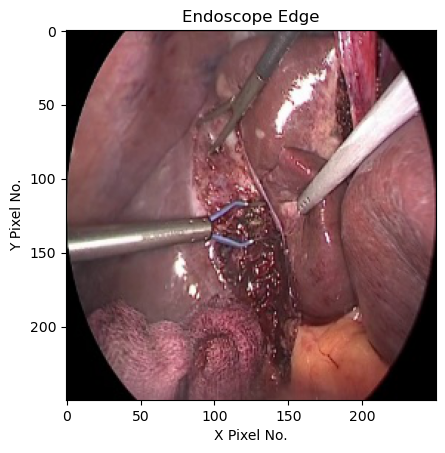

In [17]:
image = Image.open('./cholec80/frames/video53\\67996.jpg')
# image.show()

plt.imshow(image)
plt.title('Endoscope Edge')
plt.xlabel('X Pixel No.')
plt.ylabel('Y Pixel No.')
plt.show()

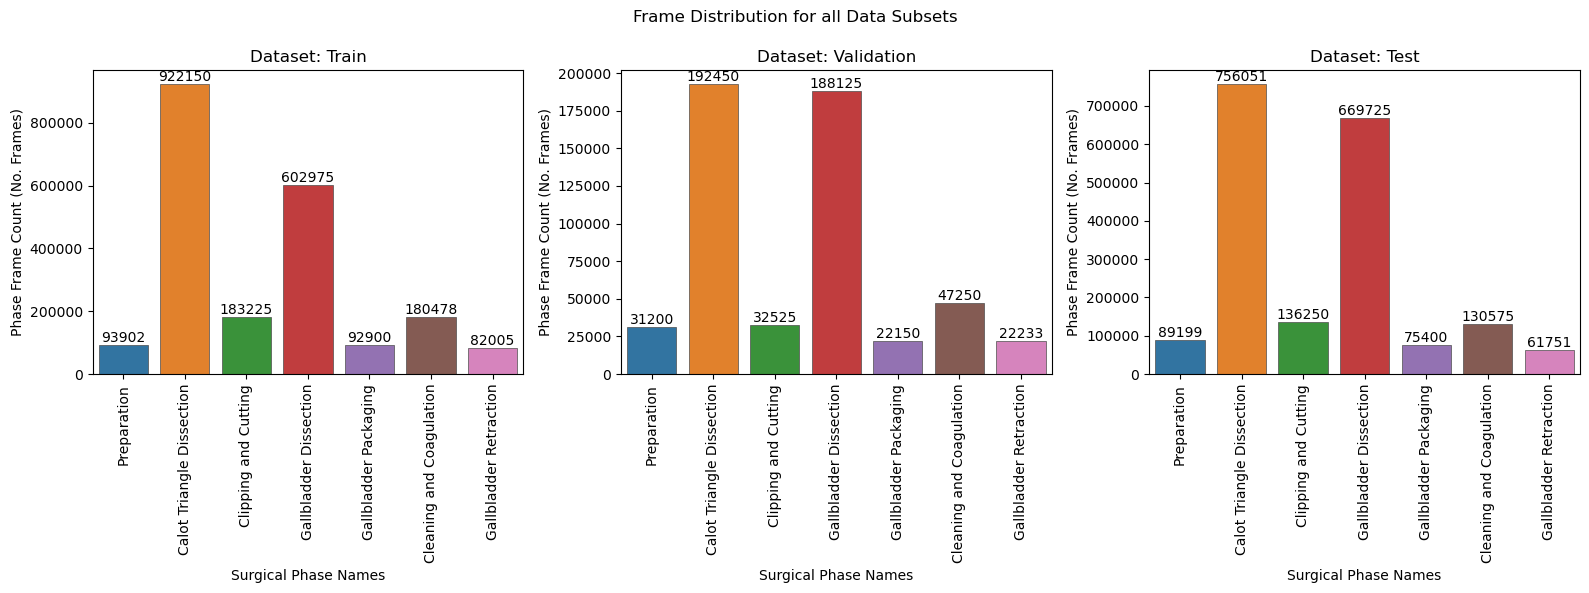

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 6))
for ax, col in zip(axs, ['Train','Validation','Test']):
    sns.countplot(
        x='phase',
        data=full_df[full_df['dataset'] == col],
        edgecolor=".3",
        linewidth=0.5,
        ax=ax
    )
    ax.set_title('Dataset: ' + col)
    ax.set_xlabel('Surgical Phase Names')
    ax.set_ylabel('Phase Frame Count (No. Frames)')
    ax.set_xticklabels(phase_names,rotation=90)

    # ax.margins(y=0.1) # make room for the labels
    for bars in ax.containers:
        ax.bar_label(bars, fmt='%d')
plt.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Frame Distribution for all Data Subsets')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()


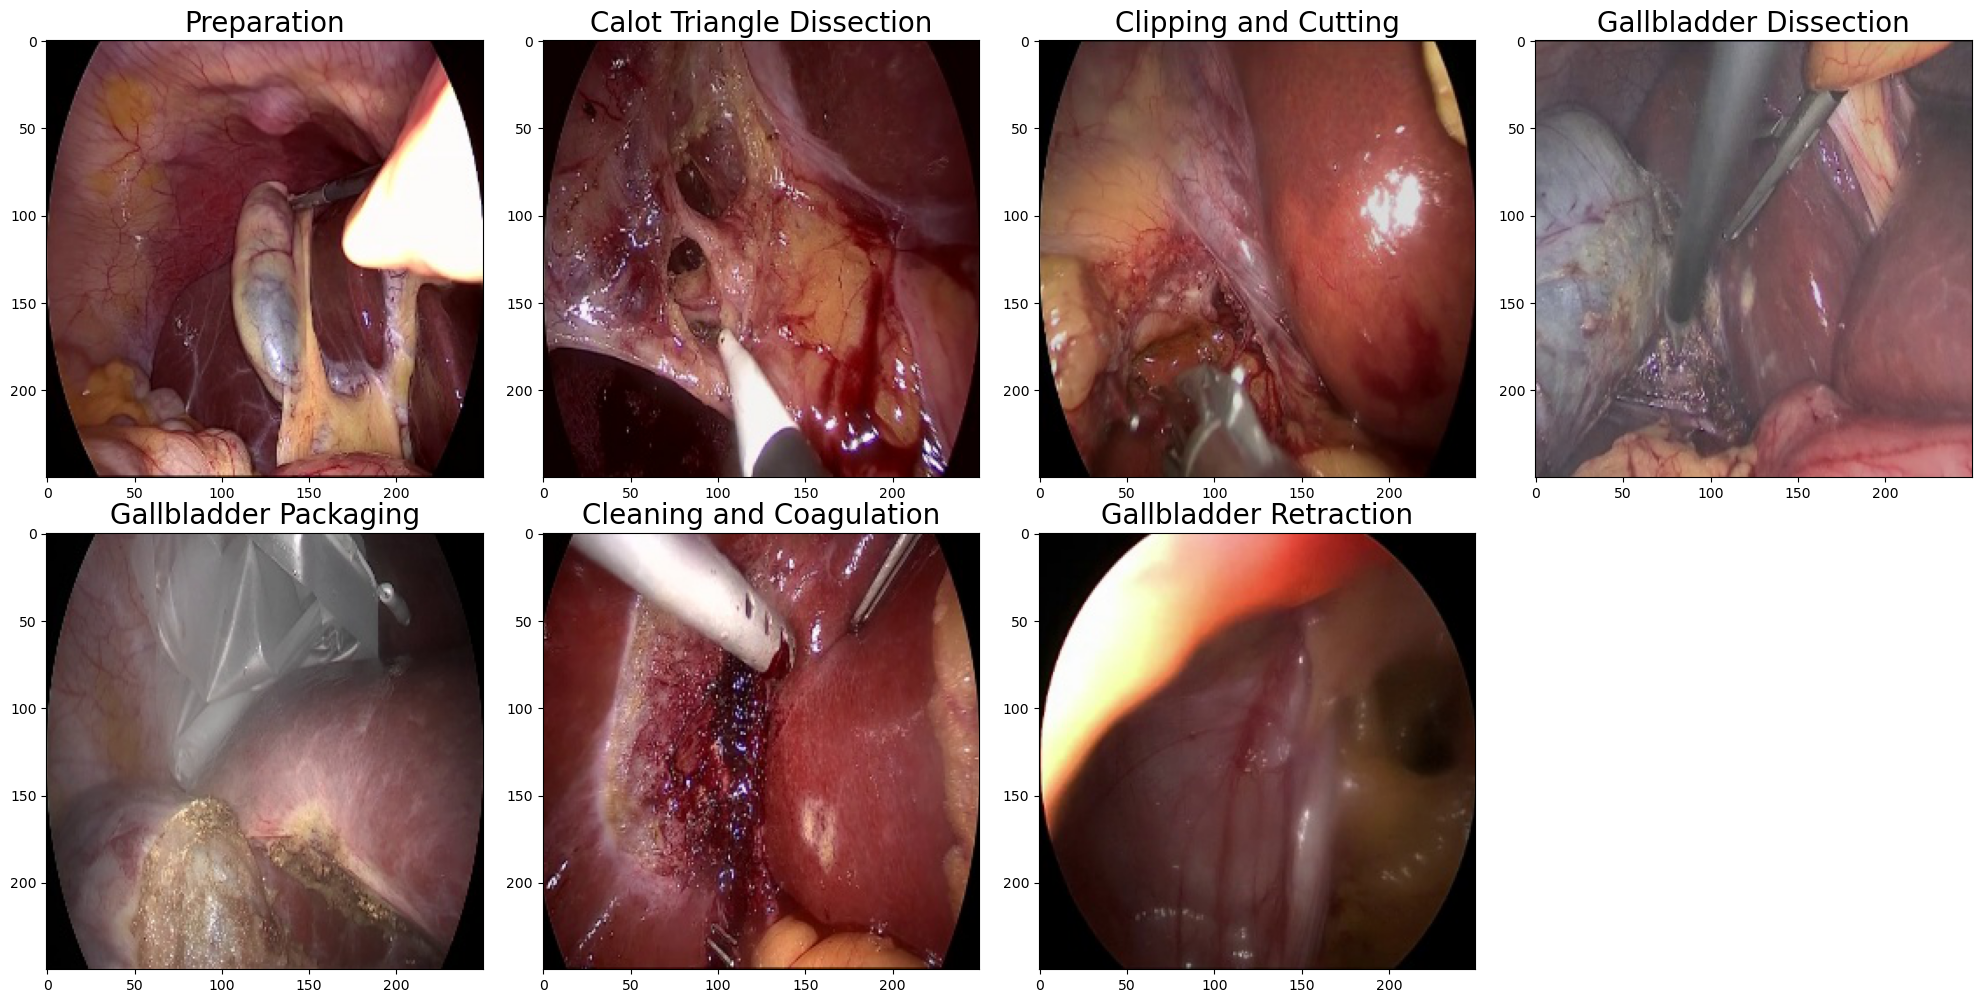

In [25]:
phase_images = full_df.groupby('phase').apply(lambda x: x.sample()).reset_index(drop=True)['image'].values


phase_images_array = [ np.array(Image.open(i).convert("RGB")) for i in phase_images]
show_image_list(list_images=phase_images_array, 
                list_titles=phase_names,
                num_cols=4,
                figsize=(20, 10),
                grid=False,
                title_fontsize=20)

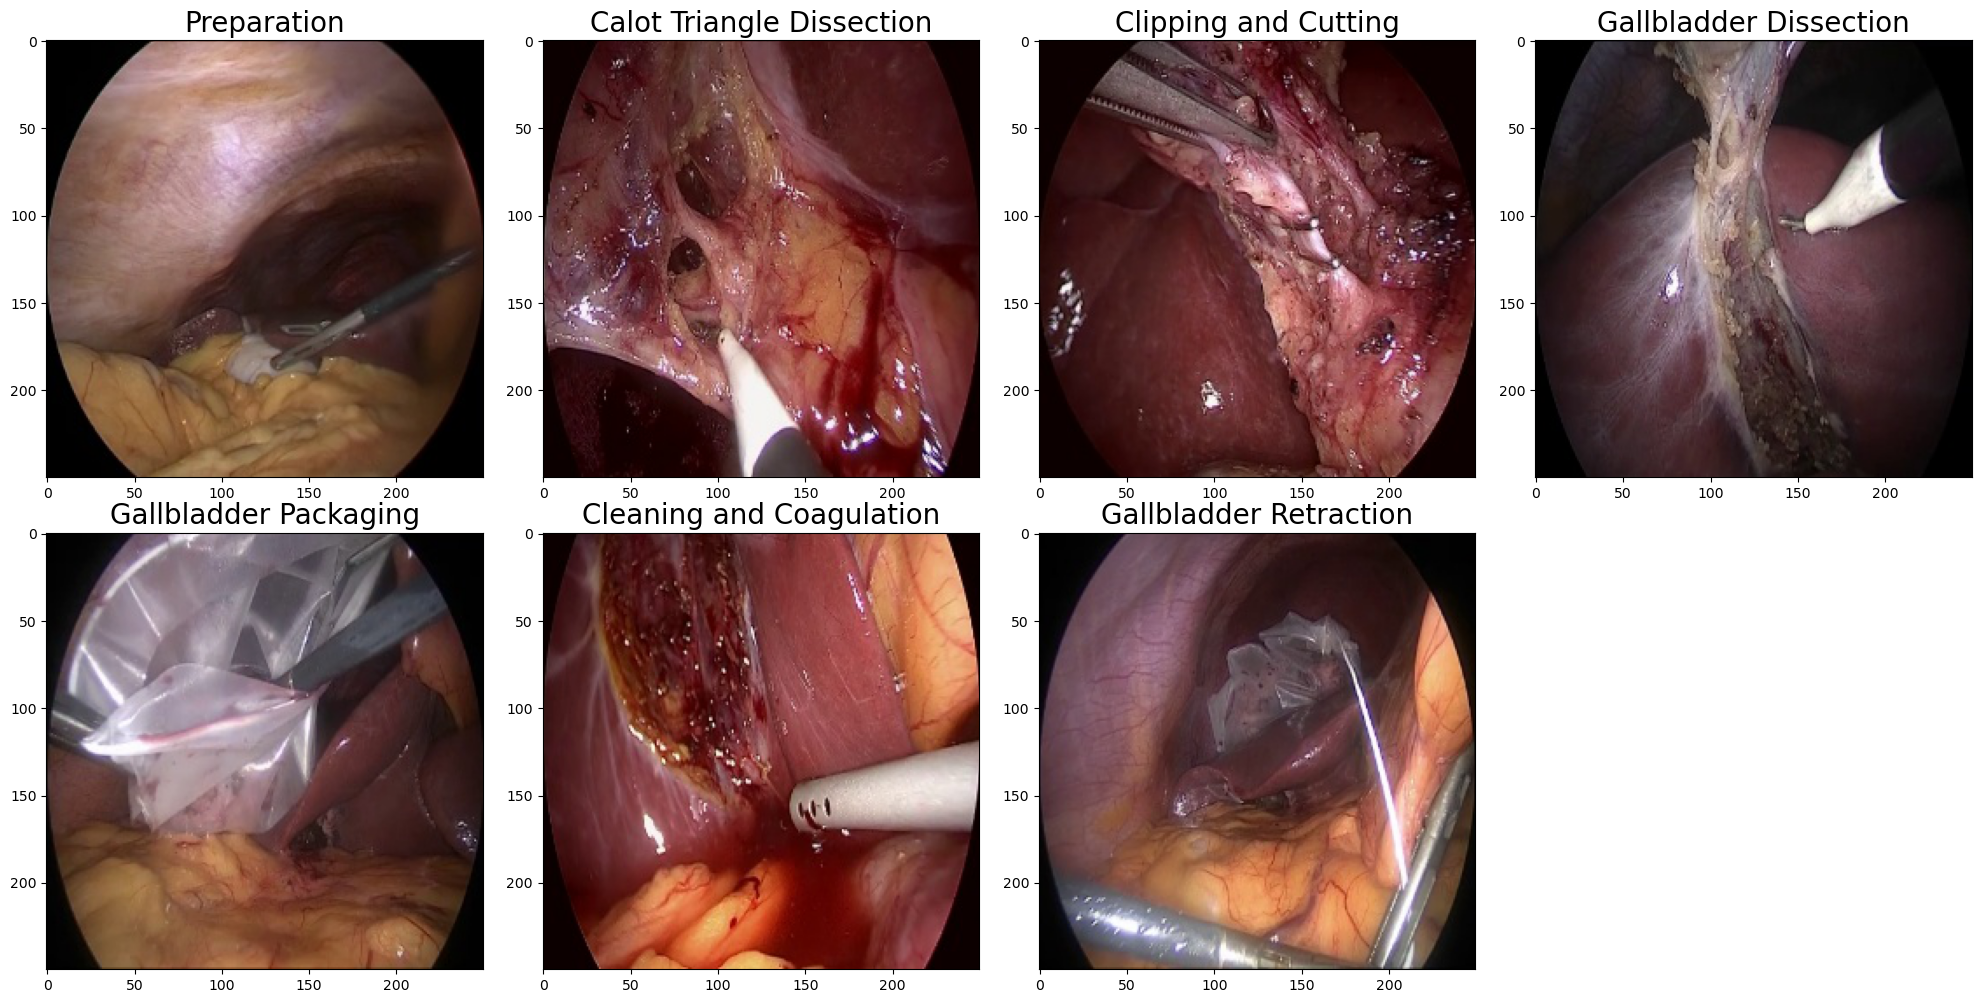

In [27]:
phase_images = ['./cholec80/frames/video37\\254.jpg','./cholec80/frames/video60\\49604.jpg','./cholec80/frames/video72\\33488.jpg','./cholec80/frames/video69\\103963.jpg','./cholec80/frames/video41\\72655.jpg','./cholec80/frames/video77\\52351.jpg','./cholec80/frames/video41\\76200.jpg']
phase_names = [
    "Preparation",
    "Calot Triangle Dissection",
    "Clipping and Cutting",
    "Gallbladder Dissection",
    "Gallbladder Packaging",
    "Cleaning and Coagulation",
    "Gallbladder Retraction",
]
phase_images_array = [ np.array(Image.open(i).convert("RGB")) for i in phase_images]
show_image_list(list_images=phase_images_array, 
                list_titles=phase_names,
                num_cols=4,
                figsize=(20, 10),
                grid=False,
                title_fontsize=20)

In [26]:
phase_images

array(['./cholec80/frames/video06\\758.jpg',
       './cholec80/frames/video60\\49604.jpg',
       './cholec80/frames/video68\\26007.jpg',
       './cholec80/frames/video70\\24431.jpg',
       './cholec80/frames/video78\\16374.jpg',
       './cholec80/frames/video20\\32928.jpg',
       './cholec80/frames/video45\\81474.jpg'], dtype=object)

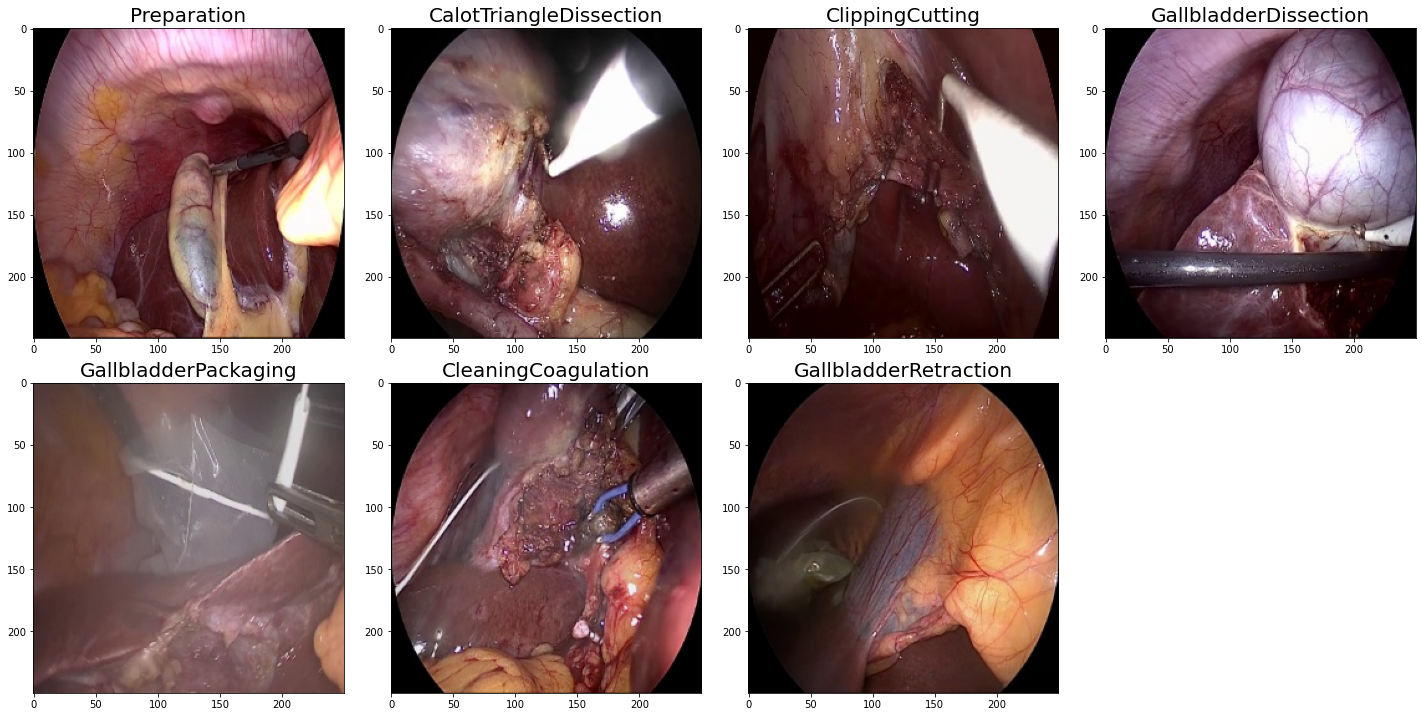

In [57]:
show_image_list(list_images=phase_images_array, 
                list_titles=phase_names,
                num_cols=4,
                figsize=(20, 10),
                grid=False,
                title_fontsize=20)

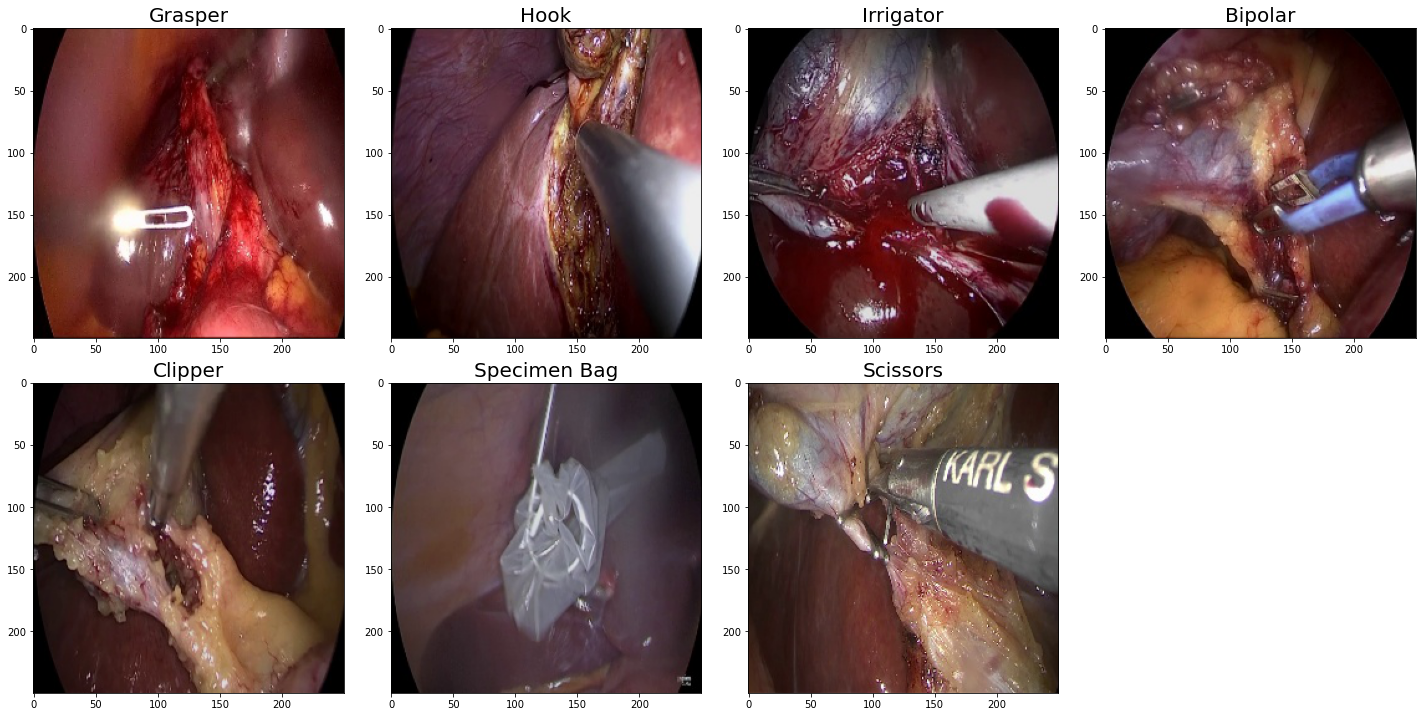

In [148]:
instrument_images = full_df[full_df['tool_target'].isin(single_instrument)].groupby('tool_target').apply(lambda x: x.sample()).reset_index(drop=True)['image'].values
instrument_images_array = [ np.array(Image.open(i).convert("RGB")) for i in instrument_images]

show_image_list(list_images=instrument_images_array, 
                list_titles=instrument_labels,
                num_cols=4,
                figsize=(20, 10),
                grid=False,
                title_fontsize=20)

In [144]:
instrument_images
#missing specimen, scissors

array(['./cholec80/frames/video41\\22692.jpg',
       './cholec80/frames/video20\\20037.jpg',
       './cholec80/frames/video65\\21909.jpg',
       './cholec80/frames/video02\\38140.jpg',
       './cholec80/frames/video15\\17971.jpg',
       './cholec80/frames/video43\\55622.jpg',
       './cholec80/frames/video73\\19735.jpg'], dtype=object)

In [149]:
instrument_images

array(['./cholec80/frames/video03\\22086.jpg',
       './cholec80/frames/video30\\47575.jpg',
       './cholec80/frames/video76\\18861.jpg',
       './cholec80/frames/video47\\25542.jpg',
       './cholec80/frames/video75\\12786.jpg',
       './cholec80/frames/video61\\106380.jpg',
       './cholec80/frames/video80\\30179.jpg'], dtype=object)

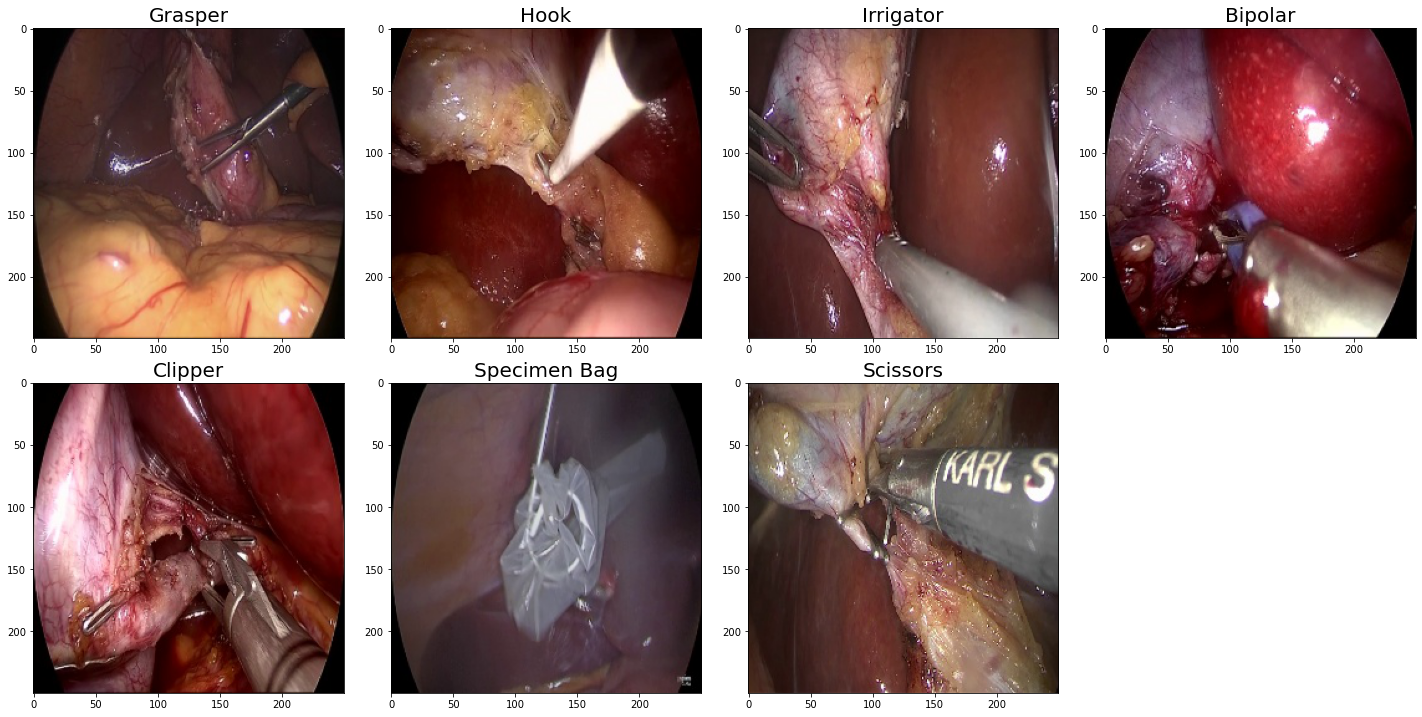

In [150]:
best_instrument_images = ['./cholec80/frames/video41\\22692.jpg',
       './cholec80/frames/video20\\20037.jpg',
       './cholec80/frames/video65\\21909.jpg',
       './cholec80/frames/video02\\38140.jpg',
       './cholec80/frames/video15\\17971.jpg',
       './cholec80/frames/video61\\106380.jpg',
       './cholec80/frames/video80\\30179.jpg']
instrument_images_array = [ np.array(Image.open(i).convert("RGB")) for i in best_instrument_images]

show_image_list(list_images=instrument_images_array, 
                list_titles=instrument_labels,
                num_cols=4,
                figsize=(20, 10),
                grid=False,
                title_fontsize=20)